In [10]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import os
from astropy.io import fits

In [51]:
# functions

def create_wavelength_array(header):
    crval1 = header["CRVAL1"]
    cdelt1 = header["CDELT1"]
    crpix1 = header["CRPIX1"]
    naxis1 = header["NAXIS1"]

    pixel_indices = np.arange(1, naxis1 + 1)
    wavelength_array = crval1 + (pixel_indices - crpix1) * cdelt1
    return wavelength_array

In [43]:
# get filepaths for data

# directories
basedir = os.getcwd()
data_dir = os.path.join(basedir, "data")
mmt_dir = os.path.join(data_dir, "MMT/SN_2018ivc/2025")
mmt_obj_counts = os.path.join(mmt_dir, "obj_counts_1D")

# Flat fielded in total counts but not flux calibrated
flat_field_spec_1d = os.path.join(mmt_dir, "obj_counts_slits_extr.fits")

# Corrected for blaze function and relatively flux calibrated (throughput-corrected).
flux_calib_spec_1d = os.path.join(mmt_dir, "obj_abs_slits_extr.fits")

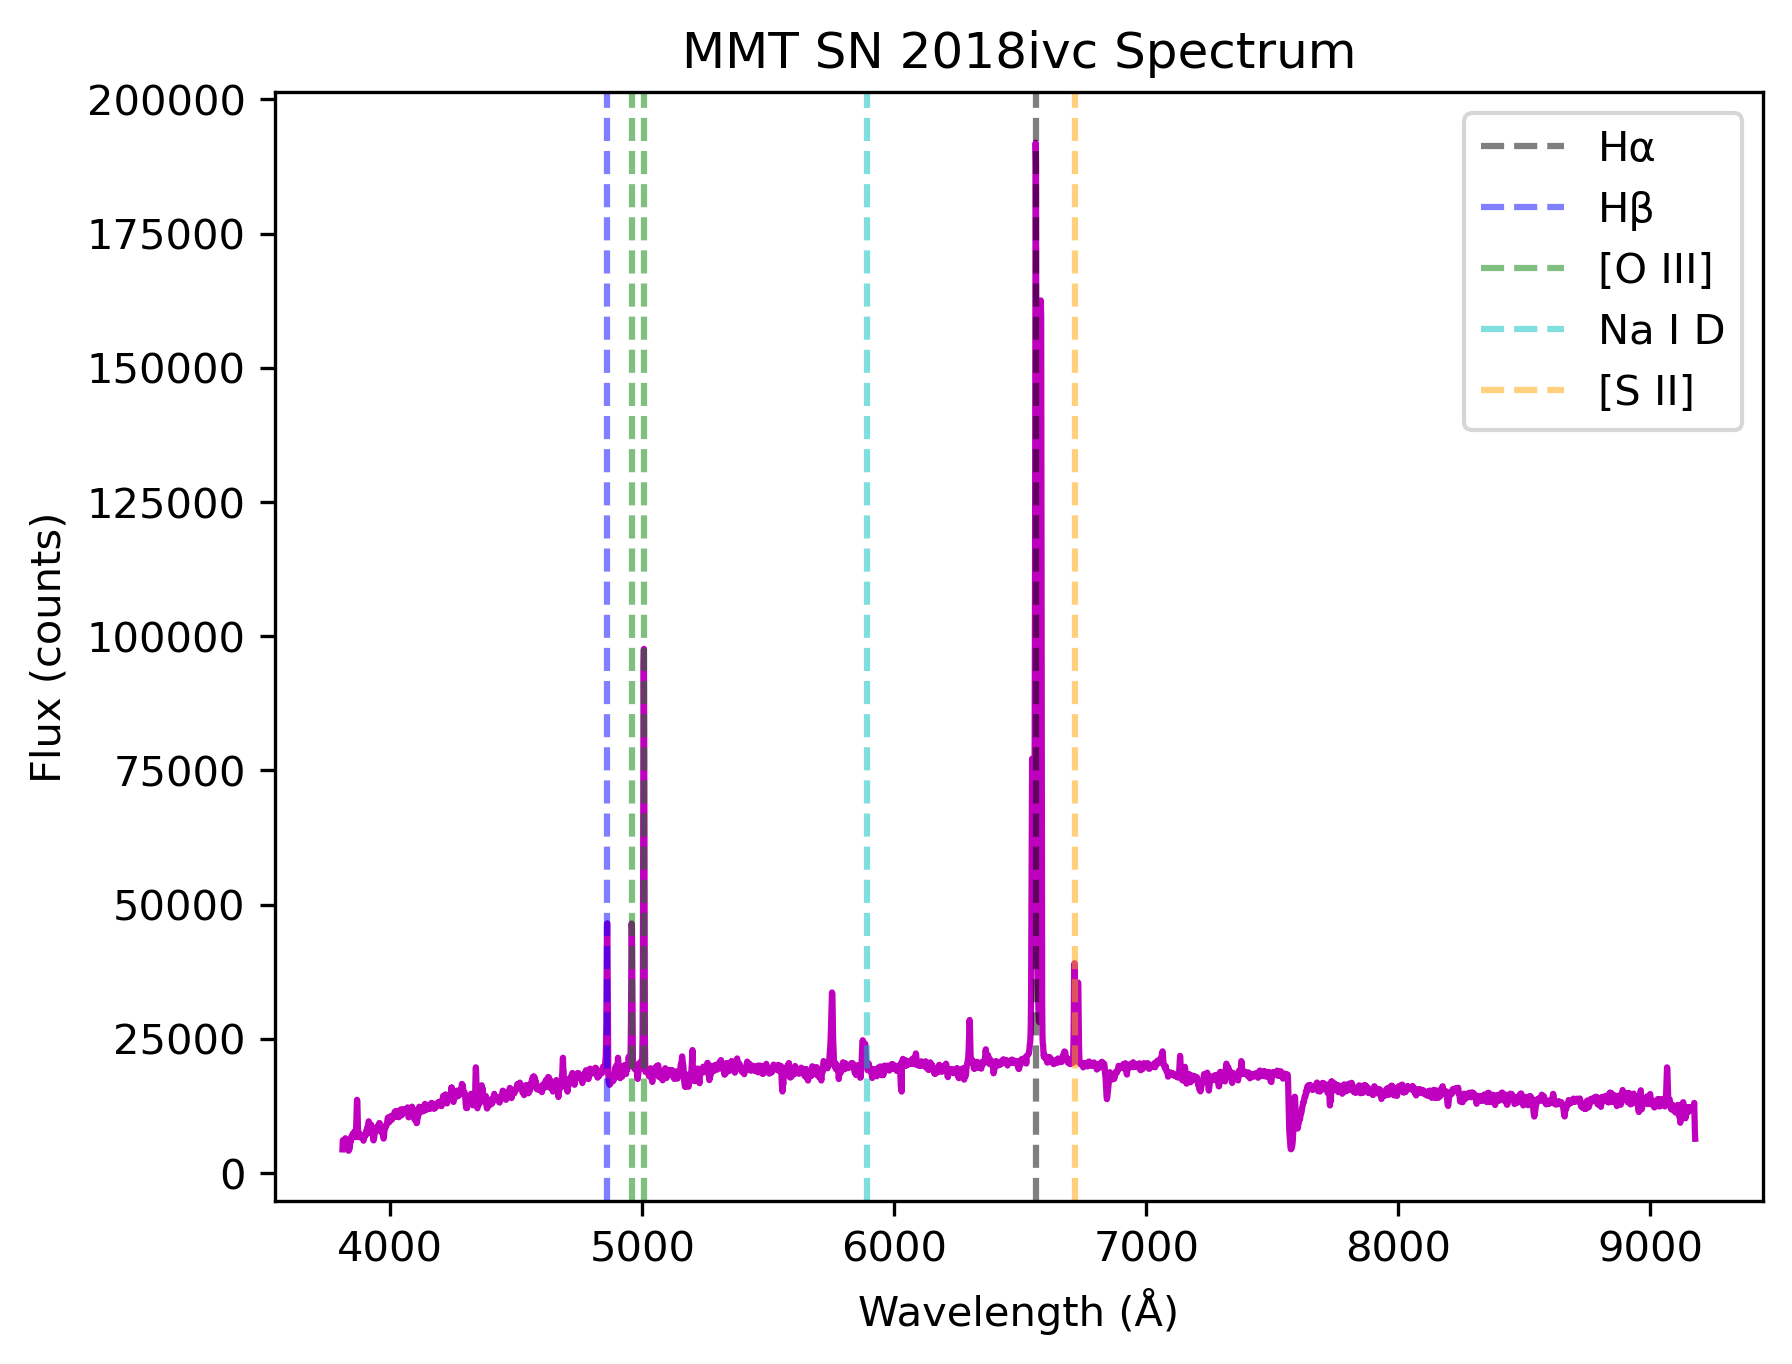

In [93]:
# Extract spectra

A_fp = os.path.join(mmt_obj_counts, "SN_2018ivc_A.fits")
B_fp = os.path.join(mmt_obj_counts, "SN_2018ivc_B.fits")

# read in data
A = fits.open(A_fp)
B = fits.open(B_fp)

data_A = A[0].data
data_B = B[0].data

header_A = A[0].header
header_B = B[0].header

# create wavelength array
wavelength_A = create_wavelength_array(header_A)
wavelength_B = create_wavelength_array(header_B)

# extract fluxes
flux_A = data_A[0, :]
flux_B = data_B[0, :]

# mask nans
mask = np.isfinite(flux_B)
wavelength_B = wavelength_B[mask]
flux_B = flux_B[mask]

z = 0.00379 # 18ivc redshift
wave_rest = wavelength_B / (1 + z)

plt.figure(dpi=300)
#plt.plot(wavelength_A, flux_A, color='g')
#plt.plot(wavelength_B, flux_B, color='m')
plt.plot(wave_rest, flux_B, color='m')
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (counts)")
plt.title("MMT SN 2018ivc Spectrum")
#plt.xlim(6000, 7000)

# try to identify some lines by eye
# Small list of common lines (Angstroms)
line_list = {
    "Hα 6563": 6562.8,
    "Hβ 4861": 4861.3,
    "[O III] 5007": 5006.8,
    "[O III] 4959": 4958.9,
    "[N II] 6583": 6583.4,
    "[S II] 6716": 6716.4,
    "[S II] 6731": 6730.8,
    "Na I D 5890": 5890.0,
    "Na I D 5896": 5896.0,
    "Ca II K 3934": 3933.7,
    "Ca II H 3968": 3968.5,
}
plt.axvline(x=6562.8, color='k', linestyle='--', label='Hα', alpha=0.5)
plt.axvline(x=4861.3, color='b', linestyle='--', label='Hβ', alpha=0.5)
plt.axvline(x=5006.8, color='g', linestyle='--', label='[O III]', alpha=0.5)
plt.axvline(x=4958.9, color='g', linestyle='--', alpha=0.5)
plt.axvline(x=5890.0, color='c', linestyle='--', label='Na I D', alpha=0.5)
plt.axvline(x=6716.4, color='orange', linestyle='--', label='[S II]', alpha=0.5)
plt.legend()

plt.show()